<a href="https://colab.research.google.com/github/JonathanLoscalzo/pytorch-tutorials/blob/master/Deep%20Learning%20with%20Pytorch/00_first_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gathering data

This data is from some ml-educational course of Google. It is a filtered dataset of kaggle (see cat vs dogs)

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2020-05-25 16:10:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  76.1MB/s    in 0.9s    

2020-05-25 16:10:51 (76.1 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
!unzip cats_and_dogs_filtered.zip -d ./

Archive:  cats_and_dogs_filtered.zip
   creating: ./cats_and_dogs_filtered/
  inflating: ./cats_and_dogs_filtered/vectorize.py  
   creating: ./cats_and_dogs_filtered/validation/
   creating: ./cats_and_dogs_filtered/train/
   creating: ./cats_and_dogs_filtered/validation/dogs/
  inflating: ./cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: ./cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: ./cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: ./cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: ./cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: ./cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: ./cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: ./cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: ./cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: ./cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: ./cats_and_dogs_fi

In [0]:
import os

In [0]:
# defining directories
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
# # Directory with our training cat pictures
# train_cats_dir = os.path.join(train_dir, 'cats')

# # Directory with our training dog pictures
# train_dogs_dir = os.path.join(train_dir, 'dogs')

# # Directory with our validation cat pictures
# validation_cats_dir = os.path.join(validation_dir, 'cats')

# # Directory with our validation dog pictures
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
import torch
import torchvision

In [0]:
if torch.cuda.is_available():
  torch.device('cuda')

In [0]:
# transformations to load images. Always we (or pytorch) need ToTensor. 
# Think that images are (h, w, channels) and torch accepts (channels, h, w)
img_size = 64
img_transforms = torchvision.transforms.Compose([
  torchvision.transforms.Resize((img_size,img_size)),
  torchvision.transforms.ToTensor(),
  torchvision.transforms.Normalize(
      mean=[0.485, 0.456, 0.406], 
      std=[0.229, 0.224, 0.225] 
  )
])


The two main conventions of interacting with data are datasets and data
loaders. A dataset is a Python class that allows us to get at the data we’re
supplying to the neural network. A data loader is what feeds data from the
dataset into the network.

In [0]:
# torchvision allows create generics Datasets from Image folders
# The torchvision package includes a class called ImageFolder that does
# pretty much everything for us, providing our images are in a structure
# where each directory is a label

train_data = torchvision.datasets.ImageFolder(root=train_dir,transform=img_transforms)
val_data = torchvision.datasets.ImageFolder(root=validation_dir, transform=img_transforms)

In [10]:
print(train_data, train_data.class_to_idx)
print(val_data, val_data.class_to_idx)

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: ./cats_and_dogs_filtered/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           ) {'cats': 0, 'dogs': 1}
Dataset ImageFolder
    Number of datapoints: 1000
    Root location: ./cats_and_dogs_filtered/validation
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           ) {'cats': 0, 'dogs': 1}


In [0]:
# experiment to see how big of a minibatch you can use without exhausting your GPU’s memory
batch_size=64 # https://pytorch.org/docs/stable/data.html
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


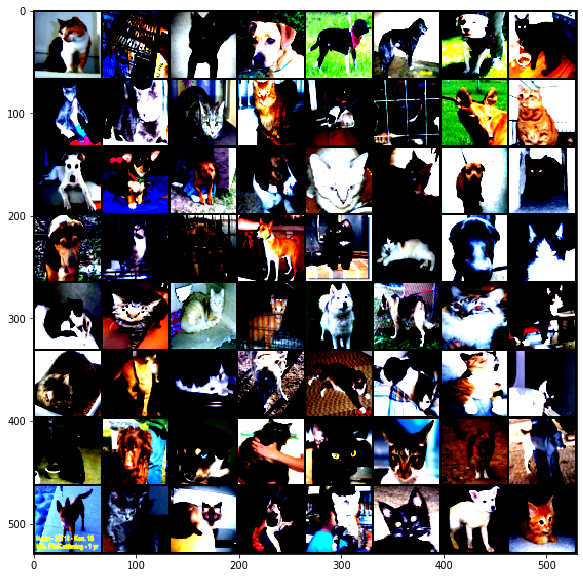

In [12]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

for inputs, targets in train_data_loader:
  plt.figure(figsize=(10,10))
  plt.imshow(make_grid(inputs).numpy().transpose(1,2,0), interpolation='nearest')
  plt.plot()
  break


### Defining the model: first NN
![image](https://databricks.com/wp-content/uploads/2019/02/neural1.jpg)

In [0]:
class SimpleNet(torch.nn.Module):
  def __init__(self, img_size=64):
    super(SimpleNet, self).__init__()
    self.input_size = (img_size**2)*3
    self.fc1 = torch.nn.Linear(self.input_size, 84)
    self.fc2 = torch.nn.Linear(84, 50)
    self.fc3 = torch.nn.Linear(50,2)

  def forward(self, x):
    x = x.view(-1, self.input_size)
    x = self.fc1(x)
    x = torch.functional.F.relu(x)
    x = self.fc2(x)
    x = torch.functional.F.relu(x)
    x = self.fc3(x)
    # loss CrossEntropyLoss also incorporates softmax
    # x = torch.functional.F.softmax(x)
    return x

In [0]:
model = SimpleNet()

In [15]:
model

SimpleNet(
  (fc1): Linear(in_features=12288, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

### Training
Training a network involves passing data through the network, using the
loss function to determine the difference between the prediction and the
actual label, and then using that information to update the weights of the
network in an attempt to make the loss function return as small a loss as
possible.

One of the key improvements that Adam makes (as does RMSProp and
AdaGrad) is that it uses a learning rate per parameter, and adapts that
learning rate depending on the rate of change of those parameters. It keeps
an exponentially decaying list of gradients and the square of those gradients
and uses those to scale the global learning rate that Adam is working with.

In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()


In [17]:
epochs=3
model.train()
training_loss = 0
for epoch in range(epochs):
  for batch in train_data_loader:
    optimizer.zero_grad()
    inputs, targets = batch
    output = model(inputs)
    loss = loss_fn(output, targets)
    loss.backward()
    optimizer.step()
    training_loss += loss.item()
  print("Epoch: ", epoch)

training_loss /= len(train_data_loader.dataset)

Epoch:  0
Epoch:  1
Epoch:  2


In [18]:
model.eval()

num_correct = 0
num_examples = 0
valid_loss = 0

for batch in val_data_loader:
  inputs, targets = batch
  output = model(inputs)
  loss = loss_fn(output,targets) 
  valid_loss += loss.data.item()
  max_elements, max_idxs = torch.max(torch.functional.F.softmax(output), dim=1) #dim 1 along files. Fixed/reduce by 1=column, 0=rows
  correct = torch.eq(max_idxs, targets)
  num_correct += torch.sum(correct).item()
  num_examples += correct.shape[0]

valid_loss /= len(val_data_loader.dataset)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


In [19]:
print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(
    epoch, 
    training_loss,
    valid_loss, 
    num_correct / num_examples)
)

Epoch: 2, Training Loss: 0.03, Validation Loss: 0.01, accuracy = 0.57


#### Refactoring: train_one_epoch as method

In [0]:
def train_one_epoch(model, inputs, targets, loss_fn, optimizer):
    optimizer.zero_grad()
    output = model(inputs)
    loss = loss_fn(output, targets)
    loss.backward()
    optimizer.step()
    return loss

def eval_one_epoch(model, inputs, targets, loss_fn):
    output = model(inputs)
    loss_val = loss_fn(output,targets) 
    max_idxs = torch.functional.F.softmax(output, dim=1).argmax(dim=1) # 
    correct = torch.eq(max_idxs, targets)
    return loss_val, correct


In [21]:
epochs=3

for epoch in range(epochs):
  model.train()
  training_loss = 0

  for batch in train_data_loader:
    inputs, targets = batch
    loss = train_one_epoch(model, inputs, targets, loss_fn, optimizer)
    training_loss += loss.item() * inputs.size(0)
  
  training_loss /= len(train_data_loader.dataset)
  model.eval()

  num_correct = 0
  num_examples = 0
  valid_loss = 0

  for batch in val_data_loader:
    inputs, targets = batch
    loss_val, correct = eval_one_epoch(model, inputs, targets, loss_fn)
    valid_loss += loss_val.data.item() * inputs.size(0)
    num_correct += torch.sum(correct).item()
    num_examples += correct.shape[0]

  valid_loss /= len(val_data_loader.dataset)

  print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(
      epoch, 
      training_loss, 
      valid_loss, 
      num_correct / num_examples
  ))



Epoch: 0, Training Loss: 0.44, Validation Loss: 0.86, accuracy = 0.57
Epoch: 1, Training Loss: 0.39, Validation Loss: 0.85, accuracy = 0.60
Epoch: 2, Training Loss: 0.31, Validation Loss: 0.96, accuracy = 0.59


### Inference

/usr/local/lib/python3.6/dist-packages/toolz/functoolz.py:634: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  data = func(data)


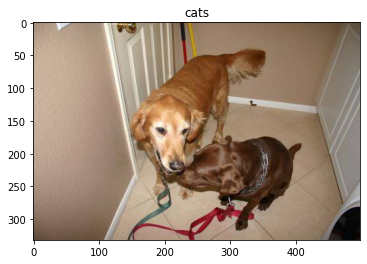

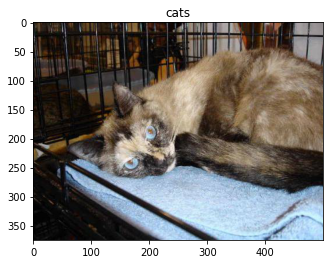

In [37]:
from toolz import pipe
from PIL import Image, ImageFile
from random import randint

labels = list(train_data.class_to_idx.keys())

model.eval()

to_evaluate = [validation_dir+f'/dogs/dog.{randint(2000,2499)}.jpg', validation_dir+f"/cats/cat.{randint(2000,2499)}.jpg"]

for ix, file in enumerate(to_evaluate):
  img = Image.open(file) 
  prediction = pipe(
      img, 
      img_transforms,
      model,
      torch.functional.F.softmax
  )
  prediction = prediction.argmax()
  plt.figure()
  plt.imshow(img)
  plt.title(labels[prediction])

### Saving Models

In [23]:
torch.save(model, "./simplenet")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type SimpleNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [24]:
torch.load("./simplenet")

SimpleNet(
  (fc1): Linear(in_features=12288, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

Using state_dict is normally preferable, as it allows you to reuse parameters even if the model's structure changes

In [25]:
# save as state_dict
torch.save(model.state_dict(), "./simplenet_statedict")    
simplenet = SimpleNet()
simplenet_state_dict = torch.load("./simplenet_statedict")
list(simplenet.parameters())

[Parameter containing:
 tensor([[-2.4825e-03, -4.7730e-03,  2.5692e-03,  ...,  3.7827e-03,
           4.2549e-03,  8.7820e-03],
         [ 8.9950e-03, -5.6875e-03,  4.7681e-03,  ...,  8.6768e-03,
           5.1118e-04,  6.7792e-03],
         [-1.2031e-03,  3.4680e-03,  8.1962e-03,  ..., -1.1123e-04,
          -3.2538e-03,  8.7102e-03],
         ...,
         [-2.5898e-03, -4.3968e-05,  3.5620e-03,  ..., -6.3155e-03,
          -2.3844e-03,  5.2457e-03],
         [ 8.4957e-03,  8.0580e-03,  2.3106e-03,  ..., -1.8710e-03,
          -7.3224e-03,  2.3847e-03],
         [-6.6730e-03, -7.8421e-03, -1.5694e-03,  ...,  8.9870e-03,
          -3.0696e-03, -8.2635e-03]], requires_grad=True),
 Parameter containing:
 tensor([ 2.2362e-05, -5.6576e-03,  8.9309e-03, -8.2370e-03,  4.0446e-03,
         -8.8819e-04, -2.9132e-03,  3.2548e-03,  4.0880e-03,  1.4967e-03,
         -2.5617e-03,  5.6522e-03,  4.7901e-03, -8.1384e-03, -5.8557e-03,
          7.3268e-03,  6.0963e-03,  6.8189e-03,  2.3458e-03,  4.07

In [26]:
simplenet.load_state_dict(simplenet_state_dict)

<All keys matched successfully>

In [27]:
list(simplenet.parameters())

[Parameter containing:
 tensor([[ 0.0192,  0.0095,  0.0196,  ...,  0.0147,  0.0112,  0.0033],
         [ 0.0129,  0.0225,  0.0225,  ..., -0.0083, -0.0030,  0.0041],
         [-0.0113, -0.0141, -0.0070,  ...,  0.0252,  0.0219,  0.0080],
         ...,
         [ 0.0199,  0.0042,  0.0214,  ...,  0.0054,  0.0179,  0.0183],
         [ 0.0029,  0.0134,  0.0058,  ...,  0.0035,  0.0133,  0.0004],
         [-0.0076, -0.0138,  0.0054,  ..., -0.0039, -0.0069, -0.0073]],
        requires_grad=True), Parameter containing:
 tensor([-1.9817e-02, -5.3329e-03, -1.7894e-02, -1.1038e-02, -3.9754e-03,
         -4.3415e-03,  1.0589e-02, -1.4323e-02, -1.7943e-02, -1.5815e-02,
          2.1721e-03, -2.7126e-02,  8.9474e-04,  5.9491e-03, -7.2491e-03,
         -7.9537e-03, -3.0506e-02, -1.7185e-02, -4.3843e-03, -2.0498e-03,
         -1.5333e-02, -1.9734e-03, -2.3116e-02, -8.9922e-03,  3.6521e-04,
         -4.0253e-03, -9.1079e-03,  1.5253e-02, -1.4590e-02, -1.6784e-03,
         -1.1807e-02, -3.6984e-03,  2.045